# ✅ Test Environnement Deep Learning

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.style.use('dark_background')  # 🕶️ Dark mode

dimension de X:  (100, 2)
dimension de y:  (100, 1)


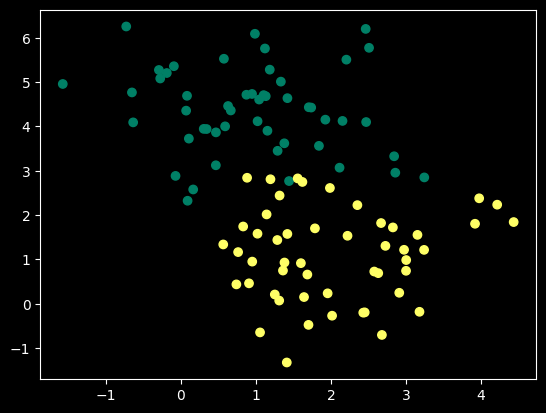

In [8]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:, 1] = X[:, 1] * 1
y = y.reshape(y.shape[0], 1)

print('dimension de X: ', X.shape)
print('dimension de y: ', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()


In [9]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [10]:
def model(X, W, b):
    Z = X.dot(W) + b
    #print(Z.max())
    A = 1 / (1 + np.exp(-Z))

    return A
           


In [11]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))
    

In [12]:
def gradients(A, X, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)


In [13]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)
    

In [14]:
def predict(X, W, b):
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
from tqdm import tqdm

In [40]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    

    for i in tqdm(range(n_iter)):
        #activations
        A = model(X_train, W, b)

        if i % 10:
            
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
            
            
            
        # Mise à jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train accuracy')
    plt.plot(test_acc, label='test accuracy')
    plt.legend()        
    plt.show()

    return (W, b)

In [18]:
def artificial_neuron_2(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)
    W[0],  W[1] = -7.5, -7.5

    nb = 10
    j=0
    history = np.zeros((n_iter // nb, 5))

    Loss = []

    # Trainning
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

        if (i % nb == 0):
            history[j, 0] = W[0].item()
            history[j, 1] = W[1].item()
            history[j, 2] = b.item() if hasattr(b, "item") else float(b)
            history[j, 3] = i
            history[j, 4] = log_loss(y, A)
            j +=1

    plt.plot(Loss)
    plt.show()

    return history, b

In [ ]:
W, b = artificial_neuron(X, y, learning_rate=0.01, n_iter=1000)

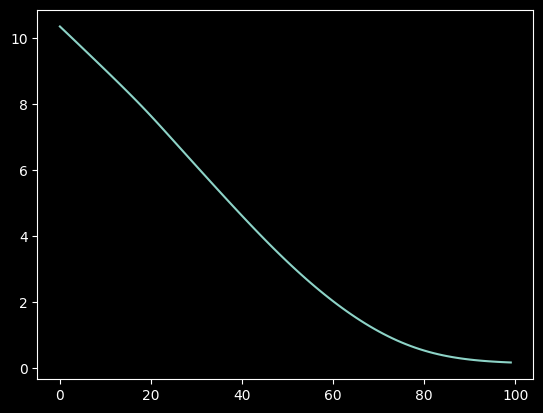

In [20]:
history, b = artificial_neuron_2(X, y)

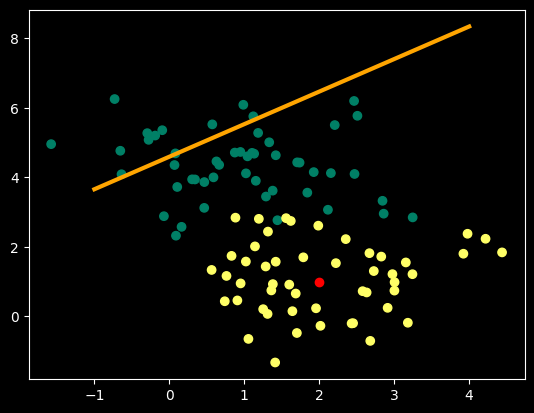

array([ True])

In [21]:
new_plant = np.array([2, 1])


x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3)


plt.show()
predict(new_plant, W, b)


In [22]:
from utilities import *

In [23]:
X_train, y_train, X_test, y_test = load_data()

In [24]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))


(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [25]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))


(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


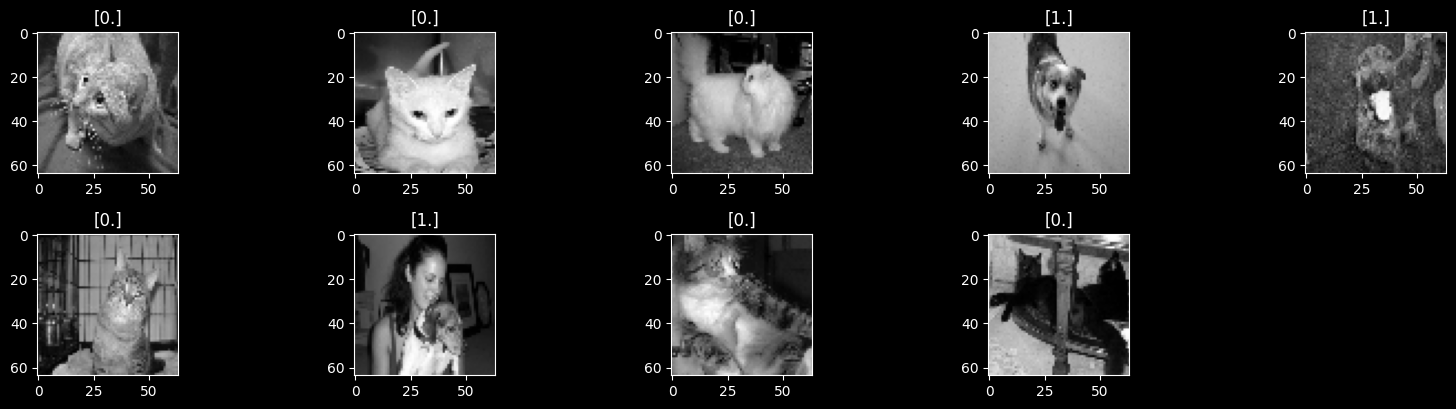

In [26]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [27]:
#X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) 
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max() #normalisation MinMax
X_train_reshape.shape

(1000, 4096)

In [35]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max() #normalisation MinMax
X_test_reshape.shape

(200, 4096)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:48<00:00, 91.78it/s]


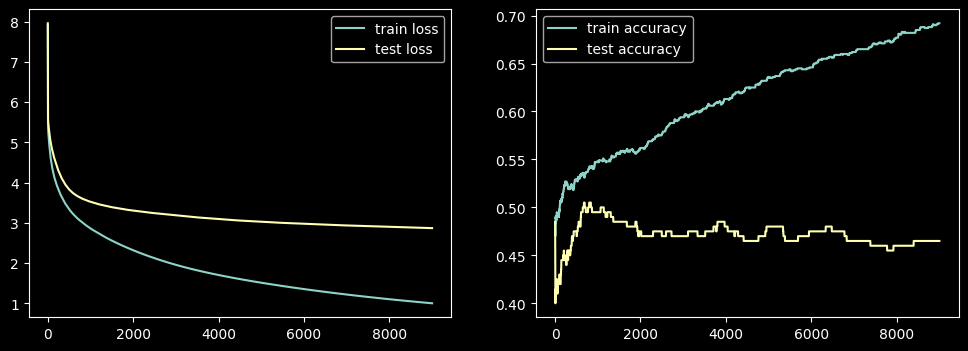

In [41]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test,  learning_rate=0.01, n_iter=10000)

In [29]:
lim = 10
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)
W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape

(2, 10000)

In [30]:
b = 0
Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z))



epsilon = 1e-15
L = 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)

L.shape


(100, 100)

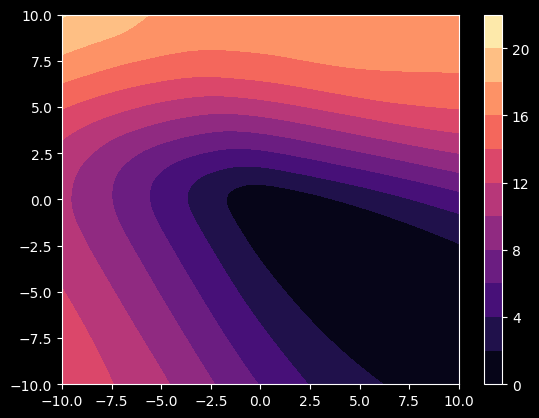

In [31]:
plt.contourf(W11, W22, L, 10, cmap="magma")
plt.colorbar()